In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from datetime import datetime
from matplotlib import rcParams

from matplotlib import rc
rc('font',family='Malgun Gothic')

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

import statsmodels.api as sm

### 1. 데이터 불러오기

In [2]:
movie_one_hot = pd.read_csv('../data/Preprocessing_movie_data/final_data.csv', parse_dates=['openingdate'])
movie_one_hot.head()

,moviename,openingdate,attendance,screen,playcount,director,actor,openingmonth,country_abroad,country_domestic,...,genre_fear,genre_mystery,genre_romance,genre_sf,genre_thriller,filmrank_G_rated,filmrank_PG 12,filmrank_PG 15,filmrank_X_rated,sales
0,극한직업,2019-01-23,16265618,2003,292584,6834886,3,1,0,1,...,0,0,0,0,0,0,0,1,0,139651845516
1,명량,2014-07-30,17613682,1587,188611,8982706,3,7,0,1,...,0,0,0,0,0,0,1,0,0,135748398910
2,어벤져스: 엔드게임,2019-04-24,13934592,2835,242001,10224854,3,4,1,0,...,0,0,0,0,0,0,1,0,0,122182694160
3,베테랑,2015-08-05,13414009,1115,199231,7576385,3,8,0,1,...,0,0,0,0,0,0,0,1,0,105168155250
4,신과함께-인과 연,2018-08-01,12274996,2235,179981,6491963,3,8,0,1,...,0,0,0,0,0,0,1,0,0,102666146909


In [3]:
movie = pd.read_csv('../data/Preprocessing_movie_data/movie.csv', parse_dates=['openingdate'])
movie.head()

,moviename,openingdate,sales,attendance,screen,playcount,country,country_label,distributor,distributor_label,director,genre,genre_label,actor,filmrank,filmrank_label,openingmonth
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,domestic,0,major_domestic,0,6834886,comedy,0,3,PG 15,0,1
1,명량,2014-07-30,135748398910,17613682,1587,188611,domestic,0,major_domestic,0,8982706,etc,1,3,PG 12,1,7
2,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,abroad,1,major_abroad,1,10224854,action,2,3,PG 12,1,4
3,베테랑,2015-08-05,105168155250,13414009,1115,199231,domestic,0,major_domestic,0,7576385,action,2,3,PG 15,0,8
4,신과함께-인과 연,2018-08-01,102666146909,12274996,2235,179981,domestic,0,major_domestic,0,6491963,fantasy,3,3,PG 12,1,8


In [7]:
movie_country_list = movie.country.unique().tolist()
movie_distributor_list = movie.distributor.unique().tolist()
movie_distributor_list[2] = 'etc'
movie_genre_list = movie.genre.unique().tolist()
movie_filmrank_list = ['g', '15', 'x', '12']

In [8]:
movie_countrys = []
for path in movie_country_list:
    movie_countrys.append(pd.read_csv('../data/Preprocessing_movie_data/movie_country_'+path+'.csv',
                          parse_dates=['openingdate']))

movie_distributors = []
for path in movie_distributor_list:
    movie_distributors.append(pd.read_csv('../data/Preprocessing_movie_data/movie_distributor_'+path+'.csv',
                          parse_dates=['openingdate']))

movie_genres = []
for path in movie_genre_list:
    movie_genres.append(pd.read_csv('../data/Preprocessing_movie_data/movie_genre_'+path+'.csv',
                          parse_dates=['openingdate']))

movie_filmranks = []
for path in movie_filmrank_list:
    movie_filmranks.append(pd.read_csv('../data/Preprocessing_movie_data/movie_filmrank_'+path+'.csv',
                          parse_dates=['openingdate']))

### 2. 상관분석

#### 2-1. 국가별

In [9]:
movie.country.unique()

array(['domestic', 'abroad'], dtype=object)

In [10]:
for i in movie.country.unique().tolist():
    print((i + ' :'), movie[movie['country'] == i]['country_label'].unique()[0])

domestic : 0
abroad : 1


In [11]:
movie_countrys[0].head()

,moviename,openingdate,sales,attendance,screen,playcount,distributor,distributor_label,director,genre,genre_label,actor,filmrank,filmrank_label,openingmonth
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,major_domestic,0,6834886,comedy,0,3,PG 15,0,1
1,명량,2014-07-30,135748398910,17613682,1587,188611,major_domestic,0,8982706,etc,1,3,PG 12,1,7
2,베테랑,2015-08-05,105168155250,13414009,1115,199231,major_domestic,0,7576385,action,2,3,PG 15,0,8
3,신과함께-인과 연,2018-08-01,102666146909,12274996,2235,179981,major_domestic,0,6491963,fantasy,3,3,PG 12,1,8
4,택시운전사,2017-08-02,95853645649,12186327,1906,184075,major_domestic,0,6849425,drama,4,3,PG 15,0,8


In [12]:
# 국내
x = movie_countrys[0][['attendance', 'screen', 'playcount', 'distributor_label',
                      'director', 'genre_label', 'actor', 'filmrank_label', 'openingmonth']]
x = sm.add_constant(x)
y = movie_countrys[0]['sales']

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.196e+04
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:18:04   Log-Likelihood:                -10308.
No. Observations:                 461   AIC:                         2.064e+04
Df Residuals:                     451   BIC:                         2.068e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.222e+09   3.52e+08     -3.467      0.001   -1.91e+09   -5.29e+08
attendance         7522.9725     60.163    125.044      0.000    7404.738    7641.207
screen             2.312e+06   2.49e+05      9.283      0.000    1.82e+06     2.8e+06
playcount          1.555e+04   4039.778      3.849      0.000    7608.085    2.35e+04
distributor_label  5.005e+07   7.15e+07      0.700      0.484   -9.05e+07    1.91e+08
director           -248.6620     50.014     -4.972      0.000    -346.951    -150.373
genre_label       -1.398e+07   1.71e+07     -0.820      0.413   -4.75e+07    1.95e+07
actor             -1.149e+08   1.03e+08     -1.118      0.264   -3.17e+08    8.71e+07
filmrank_label     8.084e+07   5.32e+07      1.521      0.129   -2.36e+07    1.85e+08
openingmonth      -3.393e+06   1.67e+07     -0.203      0.839   -3.62e+07    2.94e+07
==============================================================================
Omnibus:                      168.372   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7910.732
Skew:                           0.770   Prob(JB):                         0.00
Kurtosis:                      23.235   Cond. No.                     2.57e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# 국외
x = movie_countrys[1][['attendance', 'screen', 'playcount', 'distributor_label',
                      'director', 'genre_label', 'actor', 'filmrank_label', 'openingmonth']]
x = sm.add_constant(x)
y = movie_countrys[1]['sales']

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     7794.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:18:13   Log-Likelihood:                -12544.
No. Observations:                 560   AIC:                         2.511e+04
Df Residuals:                     550   BIC:                         2.515e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.102e+09   3.36e+08     -3.279      0.001   -1.76e+09   -4.42e+08
attendance         8164.7763    101.542     80.408      0.000    7965.320    8364.233
screen             5.456e+05   2.56e+05      2.135      0.033    4.37e+04    1.05e+06
playcount          9402.5000   5635.153      1.669      0.096   -1666.554    2.05e+04
distributor_label  1.213e+08   7.42e+07      1.635      0.103   -2.44e+07    2.67e+08
director             17.2611     74.854      0.231      0.818    -129.774     164.296
genre_label        2.649e+07   1.85e+07      1.435      0.152   -9.77e+06    6.27e+07
actor             -2.876e+06   9.21e+07     -0.031      0.975   -1.84e+08    1.78e+08
filmrank_label     9.063e+07   6.15e+07      1.473      0.141   -3.02e+07    2.11e+08
openingmonth      -1.654e+06   1.57e+07     -0.105      0.916   -3.25e+07    2.92e+07
==============================================================================
Omnibus:                      468.343   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26819.739
Skew:                           3.219   Prob(JB):                         0.00
Kurtosis:                      36.286   Cond. No.                     1.84e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 2-2. 배급사별

In [14]:
movie.distributor.unique()

array(['major_domestic', 'major_abroad', 'etc_distributor'], dtype=object)

In [15]:
for i in movie.distributor.unique().tolist():
    print((i + ' :'), movie[movie['distributor'] == i]['distributor_label'].unique()[0])

major_domestic : 0
major_abroad : 1
etc_distributor : 2


In [16]:
movie_distributors[0].head()

,moviename,openingdate,sales,attendance,screen,playcount,country,country_label,director,genre,genre_label,actor,filmrank,filmrank_label,openingmonth
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,domestic,0,6834886,comedy,0,3,PG 15,0,1
1,명량,2014-07-30,135748398910,17613682,1587,188611,domestic,0,8982706,etc,1,3,PG 12,1,7
2,베테랑,2015-08-05,105168155250,13414009,1115,199231,domestic,0,7576385,action,2,3,PG 15,0,8
3,신과함께-인과 연,2018-08-01,102666146909,12274996,2235,179981,domestic,0,6491963,fantasy,3,3,PG 12,1,8
4,택시운전사,2017-08-02,95853645649,12186327,1906,184075,domestic,0,6849425,drama,4,3,PG 15,0,8


In [17]:
# 국내 메이저 배급사
x = movie_distributors[0][['attendance', 'screen', 'playcount', 'country_label',
                      'director', 'genre_label', 'actor', 'filmrank_label', 'openingmonth']]
x = sm.add_constant(x)
y = movie_distributors[0]['sales']

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     8631.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:18:21   Log-Likelihood:                -10344.
No. Observations:                 459   AIC:                         2.071e+04
Df Residuals:                     449   BIC:                         2.075e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.139e+09   4.22e+08     -5.074      0.000   -2.97e+09   -1.31e+09
attendance      7534.0977     74.030    101.771      0.000    7388.610    7679.585
screen          2.615e+06   3.02e+05      8.665      0.000    2.02e+06    3.21e+06
playcount       1.519e+04   4887.959      3.108      0.002    5586.662    2.48e+04
country_label   7.075e+08   1.69e+08      4.196      0.000    3.76e+08    1.04e+09
director        -236.4933     63.266     -3.738      0.000    -360.827    -112.159
genre_label     5.388e+06   2.19e+07      0.246      0.806   -3.77e+07    4.85e+07
actor           9.664e+07   1.24e+08      0.778      0.437   -1.47e+08    3.41e+08
filmrank_label  1.142e+08   6.66e+07      1.715      0.087   -1.66e+07    2.45e+08
openingmonth   -1.118e+07   1.97e+07     -0.569      0.570   -4.98e+07    2.75e+07
==============================================================================
Omnibus:                      269.129   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9243.984
Skew:                           1.913   Prob(JB):                         0.00
Kurtosis:                      24.649   Cond. No.                     2.62e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# 국외 메이저 배급사
x = movie_distributors[1][['attendance', 'screen', 'playcount', 'country_label',
                      'director', 'genre_label', 'actor', 'filmrank_label', 'openingmonth']]
x = sm.add_constant(x)
y = movie_distributors[1]['sales']

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     6937.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):          1.28e-273
Time:                        15:18:23   Log-Likelihood:                -5308.3
No. Observations:                 239   AIC:                         1.064e+04
Df Residuals:                     229   BIC:                         1.067e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -9.907e+08   5.42e+08     -1.829      0.069   -2.06e+09    7.65e+07
attendance      7785.1352    104.579     74.443      0.000    7579.075    7991.195
screen          9.248e+05      3e+05      3.081      0.002    3.33e+05    1.52e+06
playcount       1.663e+04   6166.153      2.696      0.008    4476.597    2.88e+04
country_label   1.351e+08   3.17e+08      0.426      0.671    -4.9e+08     7.6e+08
director         214.6259     77.089      2.784      0.006      62.731     366.521
genre_label    -1.122e+07   2.15e+07     -0.521      0.603   -5.37e+07    3.12e+07
actor          -1.033e+08   1.27e+08     -0.815      0.416   -3.53e+08    1.46e+08
filmrank_label  4.248e+07    8.4e+07      0.506      0.614   -1.23e+08    2.08e+08
openingmonth     -3.8e+06   2.11e+07     -0.180      0.858   -4.54e+07    3.79e+07
==============================================================================
Omnibus:                       75.470   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              853.665
Skew:                           0.860   Prob(JB):                    4.26e-186
Kurtosis:                      12.098   Cond. No.                     3.02e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# 그 외 배급사
x = movie_distributors[2][['attendance', 'screen', 'playcount', 'country_label',
                      'director', 'genre_label', 'actor', 'filmrank_label', 'openingmonth']]
x = sm.add_constant(x)
y = movie_distributors[2]['sales']

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     2904.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):          1.16e-295
Time:                        15:18:25   Log-Likelihood:                -7183.7
No. Observations:                 323   AIC:                         1.439e+04
Df Residuals:                     313   BIC:                         1.443e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5.635e+08    3.7e+08     -1.523      0.129   -1.29e+09    1.64e+08
attendance      8597.7881    136.589     62.946      0.000    8329.038    8866.538
screen          6.754e+05   3.29e+05      2.053      0.041    2.81e+04    1.32e+06
playcount      -9223.4096   7584.126     -1.216      0.225   -2.41e+04    5698.904
country_label   2.212e+08   1.42e+08      1.563      0.119   -5.72e+07       5e+08
director        -139.5643     86.438     -1.615      0.107    -309.637      30.509
genre_label     2.367e+07   1.99e+07      1.188      0.236   -1.55e+07    6.29e+07
actor          -1.143e+08   9.89e+07     -1.155      0.249   -3.09e+08    8.04e+07
filmrank_label  3.865e+07   6.18e+07      0.626      0.532   -8.29e+07     1.6e+08
openingmonth    9.824e+06   1.77e+07      0.554      0.580   -2.51e+07    4.47e+07
==============================================================================
Omnibus:                      376.759   Durbin-Watson:                   1.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43577.024
Skew:                           4.851   Prob(JB):                         0.00
Kurtosis:                      59.070   Cond. No.                     1.29e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 2-3. 장르별

In [20]:
movie.genre.unique()

array(['comedy', 'etc', 'action', 'fantasy', 'drama', 'crime',
       'animation', 'sf', 'adventure', 'mystery', 'romance', 'thriller',
       'fear'], dtype=object)

In [21]:
for i in movie.genre.unique().tolist():
    print((i + ' :'), movie[movie['genre'] == i]['genre_label'].unique()[0])

comedy : 0
etc : 1
action : 2
fantasy : 3
drama : 4
crime : 5
animation : 6
sf : 7
adventure : 8
mystery : 9
romance : 10
thriller : 11
fear : 12


In [22]:
movie_genres[0].head()

,moviename,openingdate,sales,attendance,screen,playcount,country,country_label,distributor,distributor_label,director,actor,filmrank,filmrank_label,openingmonth
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,domestic,0,major_domestic,0,6834886,3,PG 15,0,1
1,7번방의 선물,2013-01-23,91431914670,12811206,866,166815,domestic,0,major_domestic,0,4590240,3,PG 15,0,1
2,수상한 그녀,2014-01-22,62705348249,8657982,1027,136975,domestic,0,major_domestic,0,5723297,3,PG 15,0,1
3,럭키,2016-10-13,56444461256,6975290,1234,155977,domestic,0,major_domestic,0,4078625,3,PG 15,0,10
4,마스터,2016-12-21,39784641065,4935320,1501,70786,domestic,0,major_domestic,0,4935320,3,PG 15,0,12


In [23]:
# comedy
x = movie_genres[0][['attendance', 'screen', 'playcount', 'country_label',
                      'director', 'distributor_label', 'actor', 'filmrank_label', 'openingmonth']]
x = sm.add_constant(x)
y = movie_genres[0]['sales']

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1478.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           1.26e-80
Time:                        15:20:20   Log-Likelihood:                -1916.8
No. Observations:                  85   AIC:                             3854.
Df Residuals:                      75   BIC:                             3878.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.168e+09   9.36e+08     -3.384      0.001   -5.03e+09    -1.3e+09
attendance         7096.8511    207.995     34.120      0.000    6682.504    7511.198
screen             1.592e+06   9.27e+05      1.716      0.090   -2.56e+05    3.44e+06
playcount          5.532e+04   1.55e+04      3.570      0.001    2.44e+04    8.62e+04
country_label      6.598e+08   4.88e+08      1.353      0.180   -3.12e+08    1.63e+09
director           -255.7564    130.093     -1.966      0.053    -514.914       3.402
distributor_label  1.174e+08   2.22e+08      0.529      0.598   -3.25e+08    5.59e+08
actor               1.95e+08   2.38e+08      0.819      0.415   -2.79e+08    6.69e+08
filmrank_label     8.846e+07   2.32e+08      0.381      0.704   -3.74e+08    5.51e+08
openingmonth       6.104e+07   5.13e+07      1.191      0.238   -4.11e+07    1.63e+08
==============================================================================
Omnibus:                       56.236   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1132.428
Skew:                           1.365   Prob(JB):                    1.25e-246
Kurtosis:                      20.672   Cond. No.                     2.10e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# etc
x = movie_genres[1][['attendance', 'screen', 'playcount', 'country_label',
                      'director', 'distributor_label', 'actor', 'filmrank_label', 'openingmonth']]
x = sm.add_constant(x)
y = movie_genres[1]['sales']

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2593.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           1.15e-28
Time:                        15:20:21   Log-Likelihood:                -656.05
No. Observations:                  30   AIC:                             1332.
Df Residuals:                      20   BIC:                             1346.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              7.017e+08   8.86e+08      0.792      0.438   -1.15e+09    2.55e+09
attendance         7684.9056    173.289     44.347      0.000    7323.432    8046.379
screen             1.189e+06   1.08e+06      1.099      0.285   -1.07e+06    3.45e+06
playcount         -1933.6535   2.14e+04     -0.090      0.929   -4.65e+04    4.26e+04
country_label      5.746e+08    6.2e+08      0.926      0.365   -7.19e+08    1.87e+09
director             56.7511    186.519      0.304      0.764    -332.320     445.822
distributor_label  2.602e+08    2.4e+08      1.084      0.291    -2.4e+08    7.61e+08
actor             -5.255e+08   2.19e+08     -2.400      0.026   -9.82e+08   -6.88e+07
filmrank_label     1.267e+08   2.27e+08      0.558      0.583   -3.47e+08    6.01e+08
openingmonth      -4.014e+07   6.38e+07     -0.629      0.537   -1.73e+08     9.3e+07
==============================================================================
Omnibus:                        1.273   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.529   Jarque-Bera (JB):                1.205
Skew:                           0.372   Prob(JB):                        0.548
Kurtosis:                       2.359   Cond. No.                     2.55e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# action
x = movie_genres[2][['attendance', 'screen', 'playcount', 'country_label',
                      'director', 'distributor_label', 'actor', 'filmrank_label', 'openingmonth']]
x = sm.add_constant(x)
y = movie_genres[2]['sales']

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     6192.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):          3.62e-261
Time:                        15:20:22   Log-Likelihood:                -5191.4
No. Observations:                 232   AIC:                         1.040e+04
Df Residuals:                     222   BIC:                         1.044e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.167e+09   5.43e+08     -3.990      0.000   -3.24e+09    -1.1e+09
attendance         7863.7268    107.508     73.146      0.000    7651.860    8075.593
screen             1.642e+06   3.14e+05      5.223      0.000    1.02e+06    2.26e+06
playcount          1.357e+04   6283.844      2.160      0.032    1188.024     2.6e+04
country_label      1.059e+09   2.52e+08      4.199      0.000    5.62e+08    1.56e+09
director            -18.7162     89.817     -0.208      0.835    -195.720     158.288
distributor_label  1.369e+08   1.25e+08      1.099      0.273   -1.09e+08    3.82e+08
actor              -1.09e+08   1.52e+08     -0.719      0.473   -4.08e+08     1.9e+08
filmrank_label     2.065e+08   9.07e+07      2.278      0.024    2.79e+07    3.85e+08
openingmonth      -3.367e+07    2.7e+07     -1.245      0.214   -8.69e+07    1.96e+07
==============================================================================
Omnibus:                       45.172   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.799
Skew:                          -0.022   Prob(JB):                    1.13e-124
Kurtosis:                      10.684   Cond. No.                     2.87e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# fantasy
x = movie_genres[3][['attendance', 'screen', 'playcount', 'country_label',
                      'director', 'distributor_label', 'actor', 'filmrank_label', 'openingmonth']]
x = sm.add_constant(x)
y = movie_genres[3]['sales']

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1561.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           9.12e-32
Time:                        15:20:22   Log-Likelihood:                -746.63
No. Observations:                  34   AIC:                             1511.
Df Residuals:                      25   BIC:                             1525.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
attendance         8446.1984    256.169     32.971      0.000    7918.608    8973.789
screen             5.462e+04   1.05e+06      0.052      0.959    -2.1e+06    2.21e+06
playcount           1.38e+04   2.02e+04      0.685      0.500   -2.77e+04    5.53e+04
country_label     -3.601e+08   6.21e+08     -0.580      0.567   -1.64e+09    9.19e+08
director           -625.6965    286.592     -2.183      0.039   -1215.944     -35.449
distributor_label -1.694e+08   2.75e+08     -0.616      0.544   -7.36e+08    3.97e+08
actor             -1.682e+08   2.78e+08     -0.604      0.551   -7.42e+08    4.05e+08
filmrank_label     7.238e+08   2.78e+08      2.606      0.015    1.52e+08     1.3e+09
openingmonth       1.409e+07   4.89e+07      0.288      0.776   -8.66e+07    1.15e+08
==============================================================================
Omnibus:                        0.981   Durbin-Watson:                   2.957
Prob(Omnibus):                  0.612   Jarque-Bera (JB):                0.255
Skew:                          -0.124   Prob(JB):                        0.880
Kurtosis:                       3.344   Cond. No.                     1.33e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
# drama
x = movie_genres[4][['attendance', 'screen', 'playcount', 'country_label',
                      'director', 'distributor_label', 'actor', 'filmrank_label', 'openingmonth']]
x = sm.add_constant(x)
y = movie_genres[4]['sales']

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     7173.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):          1.39e-239
Time:                        15:20:23   Log-Likelihood:                -4471.8
No. Observations:                 204   AIC:                             8964.
Df Residuals:                     194   BIC:                             8997.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -9.906e+08   3.29e+08     -3.007      0.003   -1.64e+09   -3.41e+08
attendance         7325.0935     84.000     87.204      0.000    7159.423    7490.763
screen             1.596e+06   2.95e+05      5.402      0.000    1.01e+06    2.18e+06
playcount          9728.1464   4884.757      1.992      0.048      94.098    1.94e+04
country_label      2.786e+08   1.51e+08      1.842      0.067   -1.97e+07    5.77e+08
director            -34.3290     61.893     -0.555      0.580    -156.399      87.741
distributor_label -1.429e+06   7.31e+07     -0.020      0.984   -1.46e+08    1.43e+08
actor             -1.031e+07   1.04e+08     -0.099      0.921   -2.16e+08    1.95e+08
filmrank_label     6.703e+07      6e+07      1.117      0.265   -5.13e+07    1.85e+08
openingmonth       9.055e+04    1.6e+07      0.006      0.995   -3.15e+07    3.16e+07
==============================================================================
Omnibus:                       49.505   Durbin-Watson:                   2.331
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              392.608
Skew:                           0.623   Prob(JB):                     5.58e-86
Kurtosis:                       9.681   Cond. No.                     1.96e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# crime
x = movie_genres[5][['attendance', 'screen', 'playcount', 'country_label',
                      'director', 'distributor_label', 'actor', 'filmrank_label', 'openingmonth']]
x = sm.add_constant(x)
y = movie_genres[5]['sales']

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1345.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           1.64e-54
Time:                        15:20:24   Log-Likelihood:                -1290.1
No. Observations:                  58   AIC:                             2600.
Df Residuals:                      48   BIC:                             2621.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.338e+09   9.58e+08     -1.395      0.169   -3.26e+09     5.9e+08
attendance         7430.3223    187.371     39.656      0.000    7053.587    7807.057
screen             2.369e+06   6.52e+05      3.636      0.001    1.06e+06    3.68e+06
playcount          2.153e+04   9288.478      2.317      0.025    2849.984    4.02e+04
country_label     -3.117e+07   5.24e+08     -0.059      0.953   -1.09e+09    1.02e+09
director           -342.3487    141.323     -2.422      0.019    -626.498     -58.200
distributor_label -6.661e+07   2.34e+08     -0.285      0.777   -5.37e+08    4.04e+08
actor             -2.921e+07   2.65e+08     -0.110      0.913   -5.62e+08    5.04e+08
filmrank_label     8.438e+07   1.24e+08      0.679      0.500   -1.65e+08    3.34e+08
openingmonth       1.457e+07    4.9e+07      0.298      0.767   -8.39e+07    1.13e+08
==============================================================================
Omnibus:                        4.141   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.126   Jarque-Bera (JB):                3.326
Skew:                          -0.386   Prob(JB):                        0.190
Kurtosis:                       3.884   Cond. No.                     2.90e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# animation
x = movie_genres[6][['attendance', 'screen', 'playcount', 'country_label',
                      'director', 'distributor_label', 'actor', 'filmrank_label', 'openingmonth']]
x = sm.add_constant(x)
y = movie_genres[6]['sales']

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1738.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):          9.47e-140
Time:                        15:20:24   Log-Likelihood:                -3338.4
No. Observations:                 151   AIC:                             6697.
Df Residuals:                     141   BIC:                             6727.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -8.244e+08   6.81e+08     -1.210      0.228   -2.17e+09    5.23e+08
attendance         7435.8783    227.230     32.724      0.000    6986.660    7885.096
screen             -6.36e+05   4.23e+05     -1.503      0.135   -1.47e+06    2.01e+05
playcount          3.696e+04   1.37e+04      2.700      0.008    9895.158     6.4e+04
country_label      1.989e+08   2.53e+08      0.785      0.434   -3.02e+08       7e+08
director             60.6508    150.933      0.402      0.688    -237.733     359.034
distributor_label -6.569e+07      1e+08     -0.656      0.513   -2.64e+08    1.32e+08
actor              2.013e+08   1.59e+08      1.267      0.207   -1.13e+08    5.15e+08
filmrank_label    -4.197e+06   2.28e+08     -0.018      0.985   -4.56e+08    4.47e+08
openingmonth      -2.822e+05   2.39e+07     -0.012      0.991   -4.74e+07    4.69e+07
==============================================================================
Omnibus:                      107.600   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1306.507
Skew:                           2.343   Prob(JB):                    1.98e-284
Kurtosis:                      16.627   Cond. No.                     1.82e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# sf
x = movie_genres[7][['attendance', 'screen', 'playcount', 'country_label',
                      'director', 'distributor_label', 'actor', 'filmrank_label', 'openingmonth']]
x = sm.add_constant(x)
y = movie_genres[7]['sales']

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     155.2
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           7.01e-21
Time:                        15:20:25   Log-Likelihood:                -863.67
No. Observations:                  37   AIC:                             1747.
Df Residuals:                      27   BIC:                             1763.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -8.09e+09   4.69e+09     -1.726      0.096   -1.77e+10    1.53e+09
attendance         8790.0825    917.279      9.583      0.000    6907.982    1.07e+04
screen             4.878e+05   3.71e+06      0.131      0.896   -7.13e+06    8.11e+06
playcount         -2.572e+04    8.5e+04     -0.303      0.765      -2e+05    1.49e+05
country_label      5.577e+09   2.84e+09      1.963      0.060   -2.52e+08    1.14e+10
director           -165.6094    765.928     -0.216      0.830   -1737.164    1405.945
distributor_label  1.882e+08    9.3e+08      0.202      0.841   -1.72e+09     2.1e+09
actor              5.146e+08   1.01e+09      0.510      0.615   -1.56e+09    2.59e+09
filmrank_label    -1.427e+08    7.7e+08     -0.185      0.854   -1.72e+09    1.44e+09
openingmonth       2.585e+08   2.46e+08      1.051      0.303   -2.46e+08    7.63e+08
==============================================================================
Omnibus:                       14.840   Durbin-Watson:                   2.583
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.310
Skew:                           1.126   Prob(JB):                     6.41e-05
Kurtosis:                       5.731   Cond. No.                     3.77e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# adventure
x = movie_genres[8][['attendance', 'screen', 'playcount', 'country_label',
                      'director', 'distributor_label', 'actor', 'filmrank_label', 'openingmonth']]
x = sm.add_constant(x)
y = movie_genres[8]['sales']

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     838.0
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           1.06e-20
Time:                        15:20:25   Log-Likelihood:                -587.95
No. Observations:                  27   AIC:                             1196.
Df Residuals:                      17   BIC:                             1209.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.515e+09   1.15e+09     -2.178      0.044   -4.95e+09   -7.89e+07
attendance         7118.9331    465.855     15.281      0.000    6136.065    8101.801
screen            -3.718e+05   1.27e+06     -0.294      0.773   -3.04e+06     2.3e+06
playcount          7.364e+04   3.38e+04      2.176      0.044    2243.880    1.45e+05
country_label      1.053e+09   9.11e+08      1.155      0.264    -8.7e+08    2.98e+09
director           -396.1070    297.068     -1.333      0.200   -1022.866     230.653
distributor_label  9.104e+07   2.54e+08      0.359      0.724   -4.44e+08    6.26e+08
actor              1.717e+08    3.8e+08      0.451      0.657   -6.31e+08    9.74e+08
filmrank_label     7.786e+08   3.11e+08      2.505      0.023    1.23e+08    1.43e+09
openingmonth      -8.341e+07   5.05e+07     -1.651      0.117    -1.9e+08    2.32e+07
==============================================================================
Omnibus:                        4.994   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                3.556
Skew:                           0.477   Prob(JB):                        0.169
Kurtosis:                       4.500   Cond. No.                     2.40e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# mystery
x = movie_genres[9][['attendance', 'screen', 'playcount', 'country_label',
                      'director', 'distributor_label', 'actor', 'filmrank_label', 'openingmonth']]
x = sm.add_constant(x)
y = movie_genres[9]['sales']

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1649.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           3.76e-17
Time:                        15:20:26   Log-Likelihood:                -463.30
No. Observations:                  22   AIC:                             946.6
Df Residuals:                      12   BIC:                             957.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.666e+09   8.13e+08     -2.049      0.063   -3.44e+09    1.05e+08
attendance         7852.6556    236.279     33.235      0.000    7337.849    8367.462
screen             1.226e+06   5.86e+05      2.093      0.058   -5.02e+04     2.5e+06
playcount          7687.7367   1.49e+04      0.518      0.614   -2.47e+04       4e+04
country_label      2.917e+08   3.15e+08      0.927      0.372   -3.94e+08    9.77e+08
director             73.6244    201.692      0.365      0.721    -365.825     513.074
distributor_label -6.678e+07   1.26e+08     -0.529      0.606   -3.42e+08    2.08e+08
actor              2.002e+08   2.44e+08      0.819      0.429   -3.32e+08    7.32e+08
filmrank_label     1.559e+08   1.19e+08      1.310      0.215   -1.03e+08    4.15e+08
openingmonth       3.704e+06   3.99e+07      0.093      0.928   -8.32e+07    9.07e+07
==============================================================================
Omnibus:                        8.163   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.554
Skew:                           0.667   Prob(JB):                       0.0229
Kurtosis:                       5.542   Cond. No.                     2.14e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# romance
x = movie_genres[10][['attendance', 'screen', 'playcount', 'country_label',
                      'director', 'distributor_label', 'actor', 'filmrank_label', 'openingmonth']]
x = sm.add_constant(x)
y = movie_genres[10]['sales']

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2347.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           3.20e-59
Time:                        15:20:27   Log-Likelihood:                -1216.1
No. Observations:                  57   AIC:                             2452.
Df Residuals:                      47   BIC:                             2473.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -6.88e+08   5.22e+08     -1.319      0.193   -1.74e+09    3.61e+08
attendance         6376.5781    141.503     45.063      0.000    6091.912    6661.245
screen             7.349e+05   5.08e+05      1.447      0.154   -2.86e+05    1.76e+06
playcount          3.814e+04   7689.323      4.960      0.000    2.27e+04    5.36e+04
country_label      3.743e+08   1.73e+08      2.164      0.036    2.63e+07    7.22e+08
director            360.0202     96.542      3.729      0.001     165.803     554.237
distributor_label  3.869e+07   8.58e+07      0.451      0.654   -1.34e+08    2.11e+08
actor             -3.403e+07   1.48e+08     -0.230      0.819   -3.32e+08    2.64e+08
filmrank_label    -5.278e+06   6.85e+07     -0.077      0.939   -1.43e+08    1.33e+08
openingmonth      -8.242e+06   1.95e+07     -0.422      0.675   -4.75e+07    3.11e+07
==============================================================================
Omnibus:                        2.630   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.269   Jarque-Bera (JB):                1.734
Skew:                           0.329   Prob(JB):                        0.420
Kurtosis:                       3.545   Cond. No.                     1.94e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# thriller
x = movie_genres[11][['attendance', 'screen', 'playcount', 'country_label',
                      'director', 'distributor_label', 'actor', 'filmrank_label', 'openingmonth']]
x = sm.add_constant(x)
y = movie_genres[11]['sales']

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1199.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           7.47e-39
Time:                        15:20:28   Log-Likelihood:                -927.15
No. Observations:                  43   AIC:                             1874.
Df Residuals:                      33   BIC:                             1892.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.096e+09   6.18e+08     -1.773      0.086   -2.35e+09    1.62e+08
attendance         6430.8264    237.420     27.086      0.000    5947.793    6913.860
screen             1.849e+06    5.7e+05      3.243      0.003    6.89e+05    3.01e+06
playcount          6.447e+04   1.09e+04      5.917      0.000    4.23e+04    8.66e+04
country_label      6.156e+08   2.42e+08      2.545      0.016    1.24e+08    1.11e+09
director            -26.4054    108.809     -0.243      0.810    -247.780     194.969
distributor_label  1.226e+07   1.21e+08      0.101      0.920   -2.34e+08    2.58e+08
actor             -4.672e+08   1.89e+08     -2.478      0.019   -8.51e+08   -8.36e+07
filmrank_label     1.837e+08   8.25e+07      2.227      0.033    1.59e+07    3.52e+08
openingmonth      -2.489e+05    3.3e+07     -0.008      0.994   -6.74e+07    6.69e+07
==============================================================================
Omnibus:                        4.269   Durbin-Watson:                   2.319
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                3.609
Skew:                           0.318   Prob(JB):                        0.165
Kurtosis:                       4.268   Cond. No.                     1.79e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# fear
x = movie_genres[12][['attendance', 'screen', 'playcount', 'country_label',
                      'director', 'distributor_label', 'actor', 'filmrank_label', 'openingmonth']]
x = sm.add_constant(x)
y = movie_genres[12]['sales']

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     980.7
Date:                Wed, 19 Jan 2022   Prob (F-statistic):           1.71e-35
Time:                        15:20:29   Log-Likelihood:                -873.89
No. Observations:                  41   AIC:                             1768.
Df Residuals:                      31   BIC:                             1785.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.078e+09   7.06e+08     -1.527      0.137   -2.52e+09    3.62e+08
attendance         7618.9628    348.122     21.886      0.000    6908.963    8328.963
screen             5.626e+05   5.44e+05      1.034      0.309   -5.47e+05    1.67e+06
playcount          1.698e+04   1.29e+04      1.320      0.197   -9259.719    4.32e+04
country_label      1.915e+08    1.9e+08      1.009      0.321   -1.96e+08    5.79e+08
director           -230.1827    338.853     -0.679      0.502    -921.278     460.913
distributor_label  2.064e+08   1.24e+08      1.661      0.107    -4.7e+07     4.6e+08
actor              1.011e+08   2.03e+08      0.499      0.622   -3.12e+08    5.15e+08
filmrank_label     1.216e+07   8.65e+07      0.141      0.889   -1.64e+08    1.89e+08
openingmonth       1.298e+07   2.97e+07      0.437      0.665   -4.76e+07    7.35e+07
==============================================================================
Omnibus:                        7.993   Durbin-Watson:                   2.389
Prob(Omnibus):                  0.018   Jarque-Bera (JB):               10.522
Skew:                           0.469   Prob(JB):                      0.00519
Kurtosis:                       5.297   Cond. No.                     1.74e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 2-4. 영상등급별

In [36]:
movie.filmrank.unique()

array(['PG 15', 'PG 12', 'G_rated', 'X_rated'], dtype=object)

In [37]:
for i in movie.filmrank.unique().tolist():
    print((i + ' :'), movie[movie['filmrank'] == i]['filmrank_label'].unique()[0])

PG 15 : 0
PG 12 : 1
G_rated : 2
X_rated : 3


In [39]:
movie_filmranks[0].head()

,moviename,openingdate,sales,attendance,screen,playcount,country,country_label,distributor,distributor_label,director,genre,genre_label,actor,openingmonth
0,겨울왕국,2014-01-16,82461504400,10296101,1010,157683,abroad,1,major_abroad,1,5337414,animation,6,2,1
1,쿵푸팬더 2,2011-05-26,44298708500,5062720,948,101338,abroad,1,major_domestic,0,4523766,animation,6,6,5
2,라이온 킹,2019-07-17,41519457430,4743264,1936,126496,abroad,1,major_abroad,1,3141537,adventure,8,3,7
3,인사이드 아웃,2015-07-09,38024694936,4969735,931,84000,abroad,1,major_abroad,1,4969735,animation,6,3,7
4,주토피아,2016-02-17,37096057742,4706158,735,131005,abroad,1,major_abroad,1,4706158,animation,6,3,2


In [40]:
# PG 15
x = movie_filmranks[0][['attendance', 'screen', 'playcount', 'country_label',
                      'director', 'distributor_label', 'actor', 'genre_label', 'openingmonth']]
x = sm.add_constant(x)
y = movie_filmranks[0]['sales']

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1818.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):          1.36e-168
Time:                        15:25:18   Log-Likelihood:                -4121.2
No. Observations:                 186   AIC:                             8262.
Df Residuals:                     176   BIC:                             8295.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -6.77e+08   4.98e+08     -1.359      0.176   -1.66e+09    3.06e+08
attendance         7477.8078    189.000     39.565      0.000    7104.809    7850.806
screen             -7.31e+05   3.86e+05     -1.895      0.060   -1.49e+06    3.04e+04
playcount          4.305e+04    1.1e+04      3.910      0.000    2.13e+04    6.48e+04
country_label      2.166e+08   2.04e+08      1.061      0.290   -1.86e+08     6.2e+08
director            -90.2933    138.207     -0.653      0.514    -363.050     182.463
distributor_label -7.462e+06   9.76e+07     -0.076      0.939      -2e+08    1.85e+08
actor              9.376e+07   1.41e+08      0.665      0.507   -1.85e+08    3.72e+08
genre_label         1.64e+07   4.98e+07      0.330      0.742   -8.18e+07    1.15e+08
openingmonth       8.043e+06   2.12e+07      0.379      0.705   -3.39e+07       5e+07
==============================================================================
Omnibus:                      103.462   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              774.300
Skew:                           1.966   Prob(JB):                    7.29e-169
Kurtosis:                      12.190   Cond. No.                     1.37e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# PG 12
x = movie_filmranks[1][['attendance', 'screen', 'playcount', 'country_label',
                      'director', 'distributor_label', 'actor', 'genre_label', 'openingmonth']]
x = sm.add_constant(x)
y = movie_filmranks[1]['sales']

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     9180.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:25:19   Log-Likelihood:                -8899.2
No. Observations:                 398   AIC:                         1.782e+04
Df Residuals:                     388   BIC:                         1.786e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.354e+09   3.86e+08     -3.511      0.000   -2.11e+09   -5.96e+08
attendance         7347.6031     75.114     97.819      0.000    7199.921    7495.285
screen             1.867e+06   2.77e+05      6.733      0.000    1.32e+06    2.41e+06
playcount          2.675e+04   4728.281      5.657      0.000    1.75e+04     3.6e+04
country_label      3.829e+08   1.42e+08      2.692      0.007    1.03e+08    6.63e+08
director           -221.3371     65.561     -3.376      0.001    -350.236     -92.439
distributor_label  8.128e+07   8.01e+07      1.014      0.311   -7.63e+07    2.39e+08
actor             -4.501e+07   1.12e+08     -0.402      0.688   -2.65e+08    1.75e+08
genre_label       -5.203e+05   1.68e+07     -0.031      0.975   -3.35e+07    3.25e+07
openingmonth      -1.345e+07   1.85e+07     -0.728      0.467   -4.98e+07    2.29e+07
==============================================================================
Omnibus:                      175.931   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8383.005
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                      25.379   Cond. No.                     2.39e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# G_rated
x = movie_filmranks[2][['attendance', 'screen', 'playcount', 'country_label',
                      'director', 'distributor_label', 'actor', 'genre_label', 'openingmonth']]
x = sm.add_constant(x)
y = movie_filmranks[2]['sales']

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2375.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):          1.24e-121
Time:                        15:25:20   Log-Likelihood:                -2628.7
No. Observations:                 120   AIC:                             5277.
Df Residuals:                     110   BIC:                             5305.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.266e+09   4.47e+08     -2.831      0.006   -2.15e+09    -3.8e+08
attendance         7192.2305    181.417     39.645      0.000    6832.705    7551.756
screen             1.259e+06   3.75e+05      3.359      0.001    5.16e+05       2e+06
playcount          3.187e+04   1.01e+04      3.158      0.002    1.19e+04    5.19e+04
country_label      6.155e+08   2.09e+08      2.944      0.004    2.01e+08    1.03e+09
director            -42.2922     76.281     -0.554      0.580    -193.463     108.879
distributor_label  1.025e+08   1.02e+08      1.004      0.318   -9.98e+07    3.05e+08
actor             -6.522e+06   1.06e+08     -0.062      0.951   -2.17e+08    2.04e+08
genre_label       -2.133e+07   2.18e+07     -0.976      0.331   -6.46e+07     2.2e+07
openingmonth       1.504e+07   2.42e+07      0.621      0.536    -3.3e+07     6.3e+07
==============================================================================
Omnibus:                       61.802   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              590.046
Skew:                           1.419   Prob(JB):                    7.47e-129
Kurtosis:                      13.486   Cond. No.                     1.76e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
# X_rated
x = movie_filmranks[3][['attendance', 'screen', 'playcount', 'country_label',
                      'director', 'distributor_label', 'actor', 'genre_label', 'openingmonth']]
x = sm.add_constant(x)
y = movie_filmranks[3]['sales']

model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     5328.
Date:                Wed, 19 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:25:21   Log-Likelihood:                -7164.4
No. Observations:                 317   AIC:                         1.435e+04
Df Residuals:                     307   BIC:                         1.439e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.453e+09   5.59e+08     -4.388      0.000   -3.55e+09   -1.35e+09
attendance         8060.7218    101.876     79.123      0.000    7860.257    8261.186
screen             2.019e+06   3.86e+05      5.226      0.000    1.26e+06    2.78e+06
playcount          2212.3072   6905.640      0.320      0.749   -1.14e+04    1.58e+04
country_label      9.696e+08    2.1e+08      4.611      0.000    5.56e+08    1.38e+09
director            -63.7558     81.902     -0.778      0.437    -224.916      97.404
distributor_label  1.913e+08    1.2e+08      1.597      0.111   -4.44e+07    4.27e+08
actor              1.554e+07   1.59e+08      0.098      0.922   -2.98e+08    3.29e+08
genre_label        3.247e+07   3.42e+07      0.949      0.343   -3.49e+07    9.98e+07
openingmonth      -6.961e+05   2.61e+07     -0.027      0.979   -5.21e+07    5.07e+07
==============================================================================
Omnibus:                      291.364   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15067.103
Skew:                           3.456   Prob(JB):                         0.00
Kurtosis:                      36.060   Cond. No.                     2.60e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
print(movie.country.value_counts())
print(movie.distributor.value_counts())
print(movie.genre.value_counts())
print(movie.filmrank.value_counts())

abroad      560
domestic    461
Name: country, dtype: int64
major_domestic     459
etc_distributor    323
major_abroad       239
Name: distributor, dtype: int64
action       232
drama        204
animation    151
comedy        85
crime         58
romance       57
thriller      43
fear          41
sf            37
fantasy       34
etc           30
adventure     27
mystery       22
Name: genre, dtype: int64
PG 15      398
PG 12      317
G_rated    186
X_rated    120
Name: filmrank, dtype: int64


### p-value 가 0.05 이하인 변인들


#### 1. 국가별
+ 국내
    - attendance, screen, playcount, director
+ 국외
    - attendance

#### 2. 배급사별
+ 국내 메이저
    - attendance, screen, playcount, country_label, director
+ 국외 메이저
    - attendance, screen, playcount, director
+ 그 외
    - attendance

#### 3. 장르별
+ comedy
    - attendance, playcount
+ etc
    - attendance
+ action
    - attendance, screen, country_label
+ fantasy
    - attendance
+ drama
    - attendance, screen
+ crime
    - attendance, screen
+ animation
    - attendance, playcount
+ sf
    - attendance
+ adventure
    - attendance, playcount, filmrank_label
+ mystery
    - attendance, screen
+ romance
    - attendance, playcount, country_label, director
+ thriller
    - attendance, screen, playcount, country_label, country_label, actor, filmrank_label
+ fear
    - attendance

#### 4. 연령등급별
+ PG 15
    - attendance, screen, playcount
+ PG 12
    - attendance, screen, playcount, country_label, director
+ G_rated
    - attendance. screen. playcount, country_label
+ X_rated
    - attendance, screen, country_label

<AxesSubplot:>

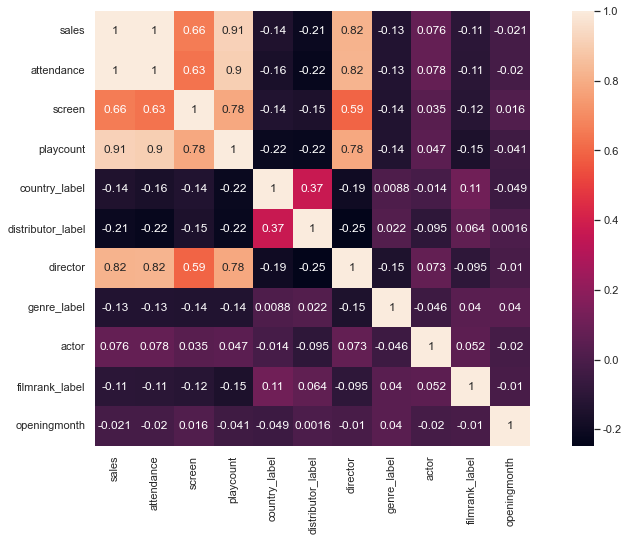

In [53]:
cols = ['sales', 'attendance', 'screen',
        'playcount', 'country_label',
        'distributor_label', 'director', 'genre_label', 'actor',
        'filmrank_label', 'openingmonth']
heat = np.corrcoef(movie[cols].T)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(heat, annot=True, yticklabels=cols, xticklabels=cols, square=True)

attendance, screen, playcount, director